# Embeddings Analysis of Detached Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import os

In [2]:
from tqdm import tqdm

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap,Normalize
import matplotlib.colors as mcolors
import matplotlib
from matplotlib.font_manager import FontProperties
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
font_path ='whitney-medium.otf'
custom_font = FontProperties(fname=font_path)
from matplotlib.patches import Rectangle

In [4]:
jet_cmap = plt.get_cmap('RdYlBu_r')
new_colors1 = [jet_cmap(i) for i in np.linspace(0, 0.3, 256)]
new_colors2 = [jet_cmap(i) for i in np.linspace(0.3, 1, 256)]
new_colors = new_colors1+new_colors2
custom_jet_cmap = LinearSegmentedColormap.from_list('custom_jet', new_colors, N=256)

## Human Autocorrelation Matrix

In [5]:
cortical_embedding_path = '../../TRembeddings/FinalModels/MixData_Cortical_Train_Repeat1000/*/*/*'

In [6]:
subcortical_embedding_path = '../../TRembeddings/FinalModels/MixData_SubCortical_Train_Repeat1000/*/*/*'

In [7]:
H_cortical_corr = []
for path in tqdm(glob.glob(cortical_embedding_path)):
    human_cortical_emb = pd.read_csv(os.path.join(path,'Human_Cortical_Embedding.csv'))
    human_cortical_emb.set_index('index',inplace = True,drop = True)
    corr_ = np.corrcoef(human_cortical_emb.values)
    H_cortical_corr.append(corr_)

100%|██████████| 1000/1000 [00:33<00:00, 30.23it/s]


In [8]:
H_cortical_corr_mean =  pd.DataFrame(np.mean(H_cortical_corr,axis=0),index = human_cortical_emb.index.values,columns = human_cortical_emb.index.values)

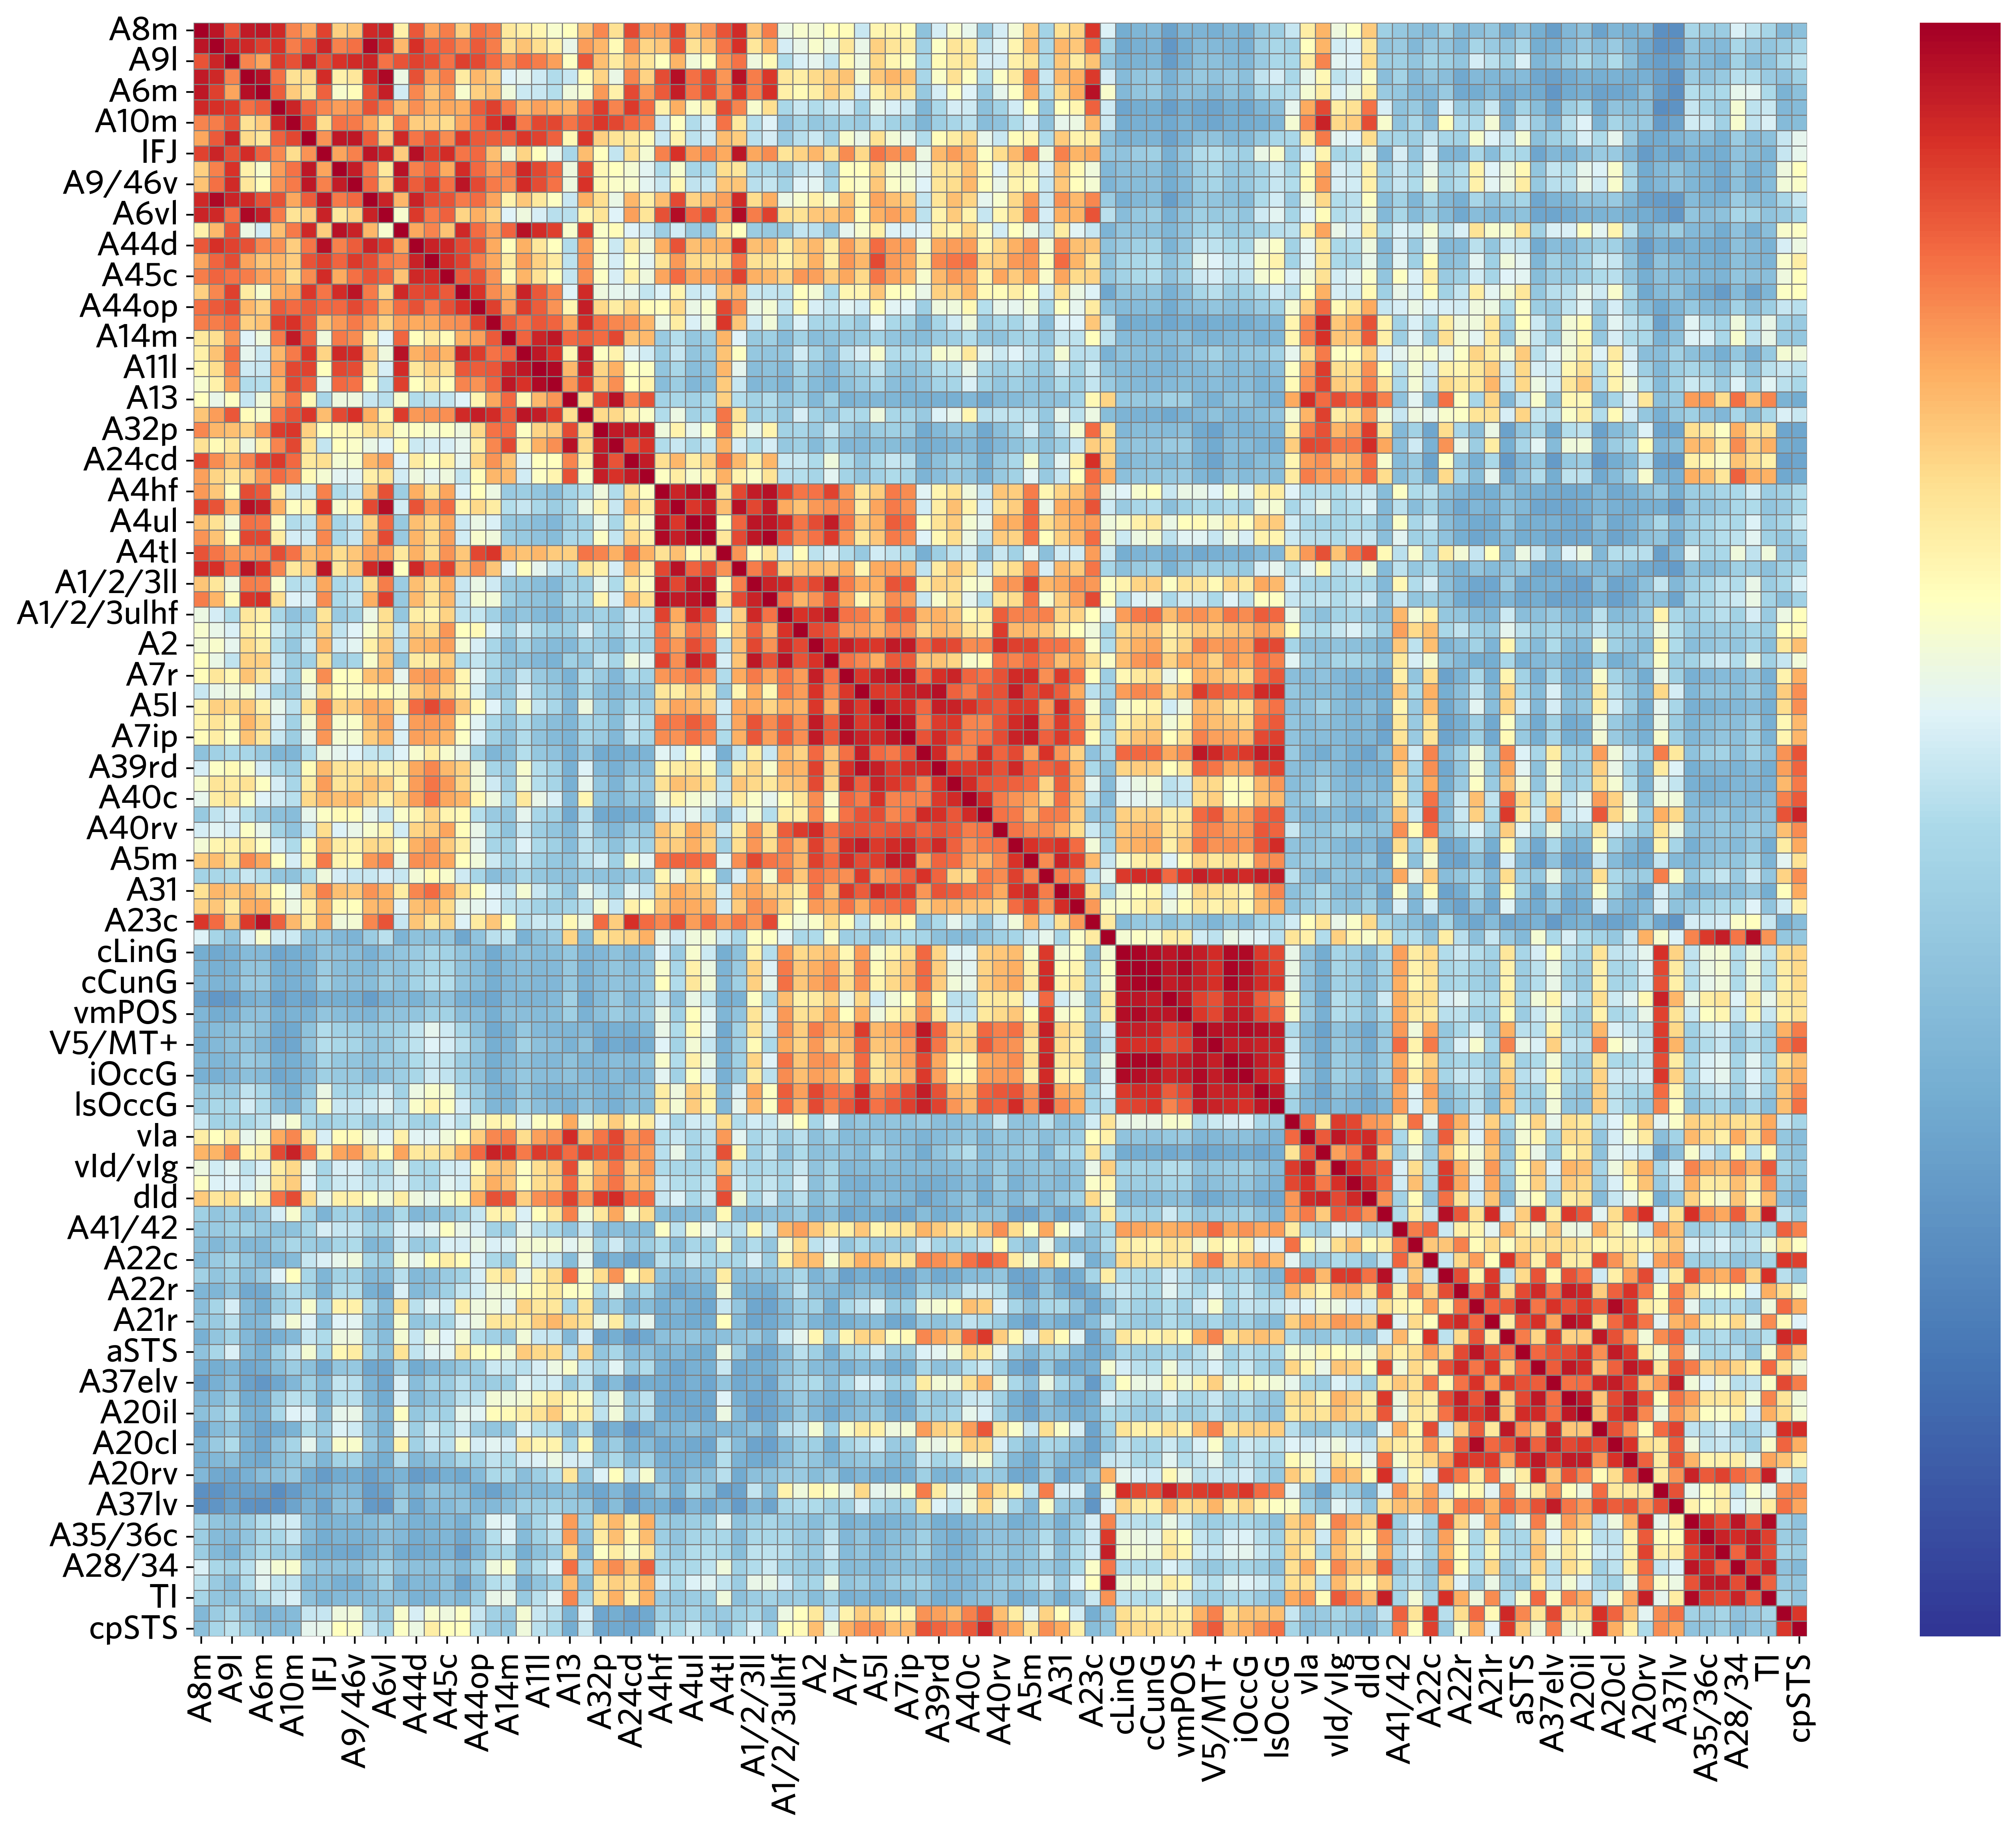

In [12]:
plt.figure(figsize=(15, 12),dpi=400)
colors = ["navy", "white", "#B22222"]
ax = sns.heatmap(H_cortical_corr_mean,cmap=custom_jet_cmap,linewidths=0.5,linecolor='gray',vmin=-1,vmax=1,square=True,cbar_kws={"ticks": []})
plt.subplots_adjust(bottom=0.2)
# plt.yticks([])
plt.xticks([i+0.5 for i in range(0,106,2)],rotation=90,fontproperties=custom_font,size=16)
plt.yticks([i+0.5 for i in range(0,106,2)],rotation=0,fontproperties=custom_font,size=16)
plt.tight_layout()

In [13]:
H_subcortical_corr = []
for path in tqdm(glob.glob(subcortical_embedding_path)):
    human_subcortical_emb = pd.read_csv(os.path.join(path,'Human_SubCortical_Embedding.csv'))
    human_subcortical_emb.set_index('index',inplace = True,drop = True)
    corr_ = np.corrcoef(human_subcortical_emb.values)
    H_subcortical_corr.append(corr_)

100%|██████████| 1000/1000 [00:09<00:00, 110.97it/s]


In [14]:
H_subcortical_corr_mean = pd.DataFrame(np.mean(H_subcortical_corr,axis=0),index = human_subcortical_emb.index.values,columns = human_subcortical_emb.index.values)

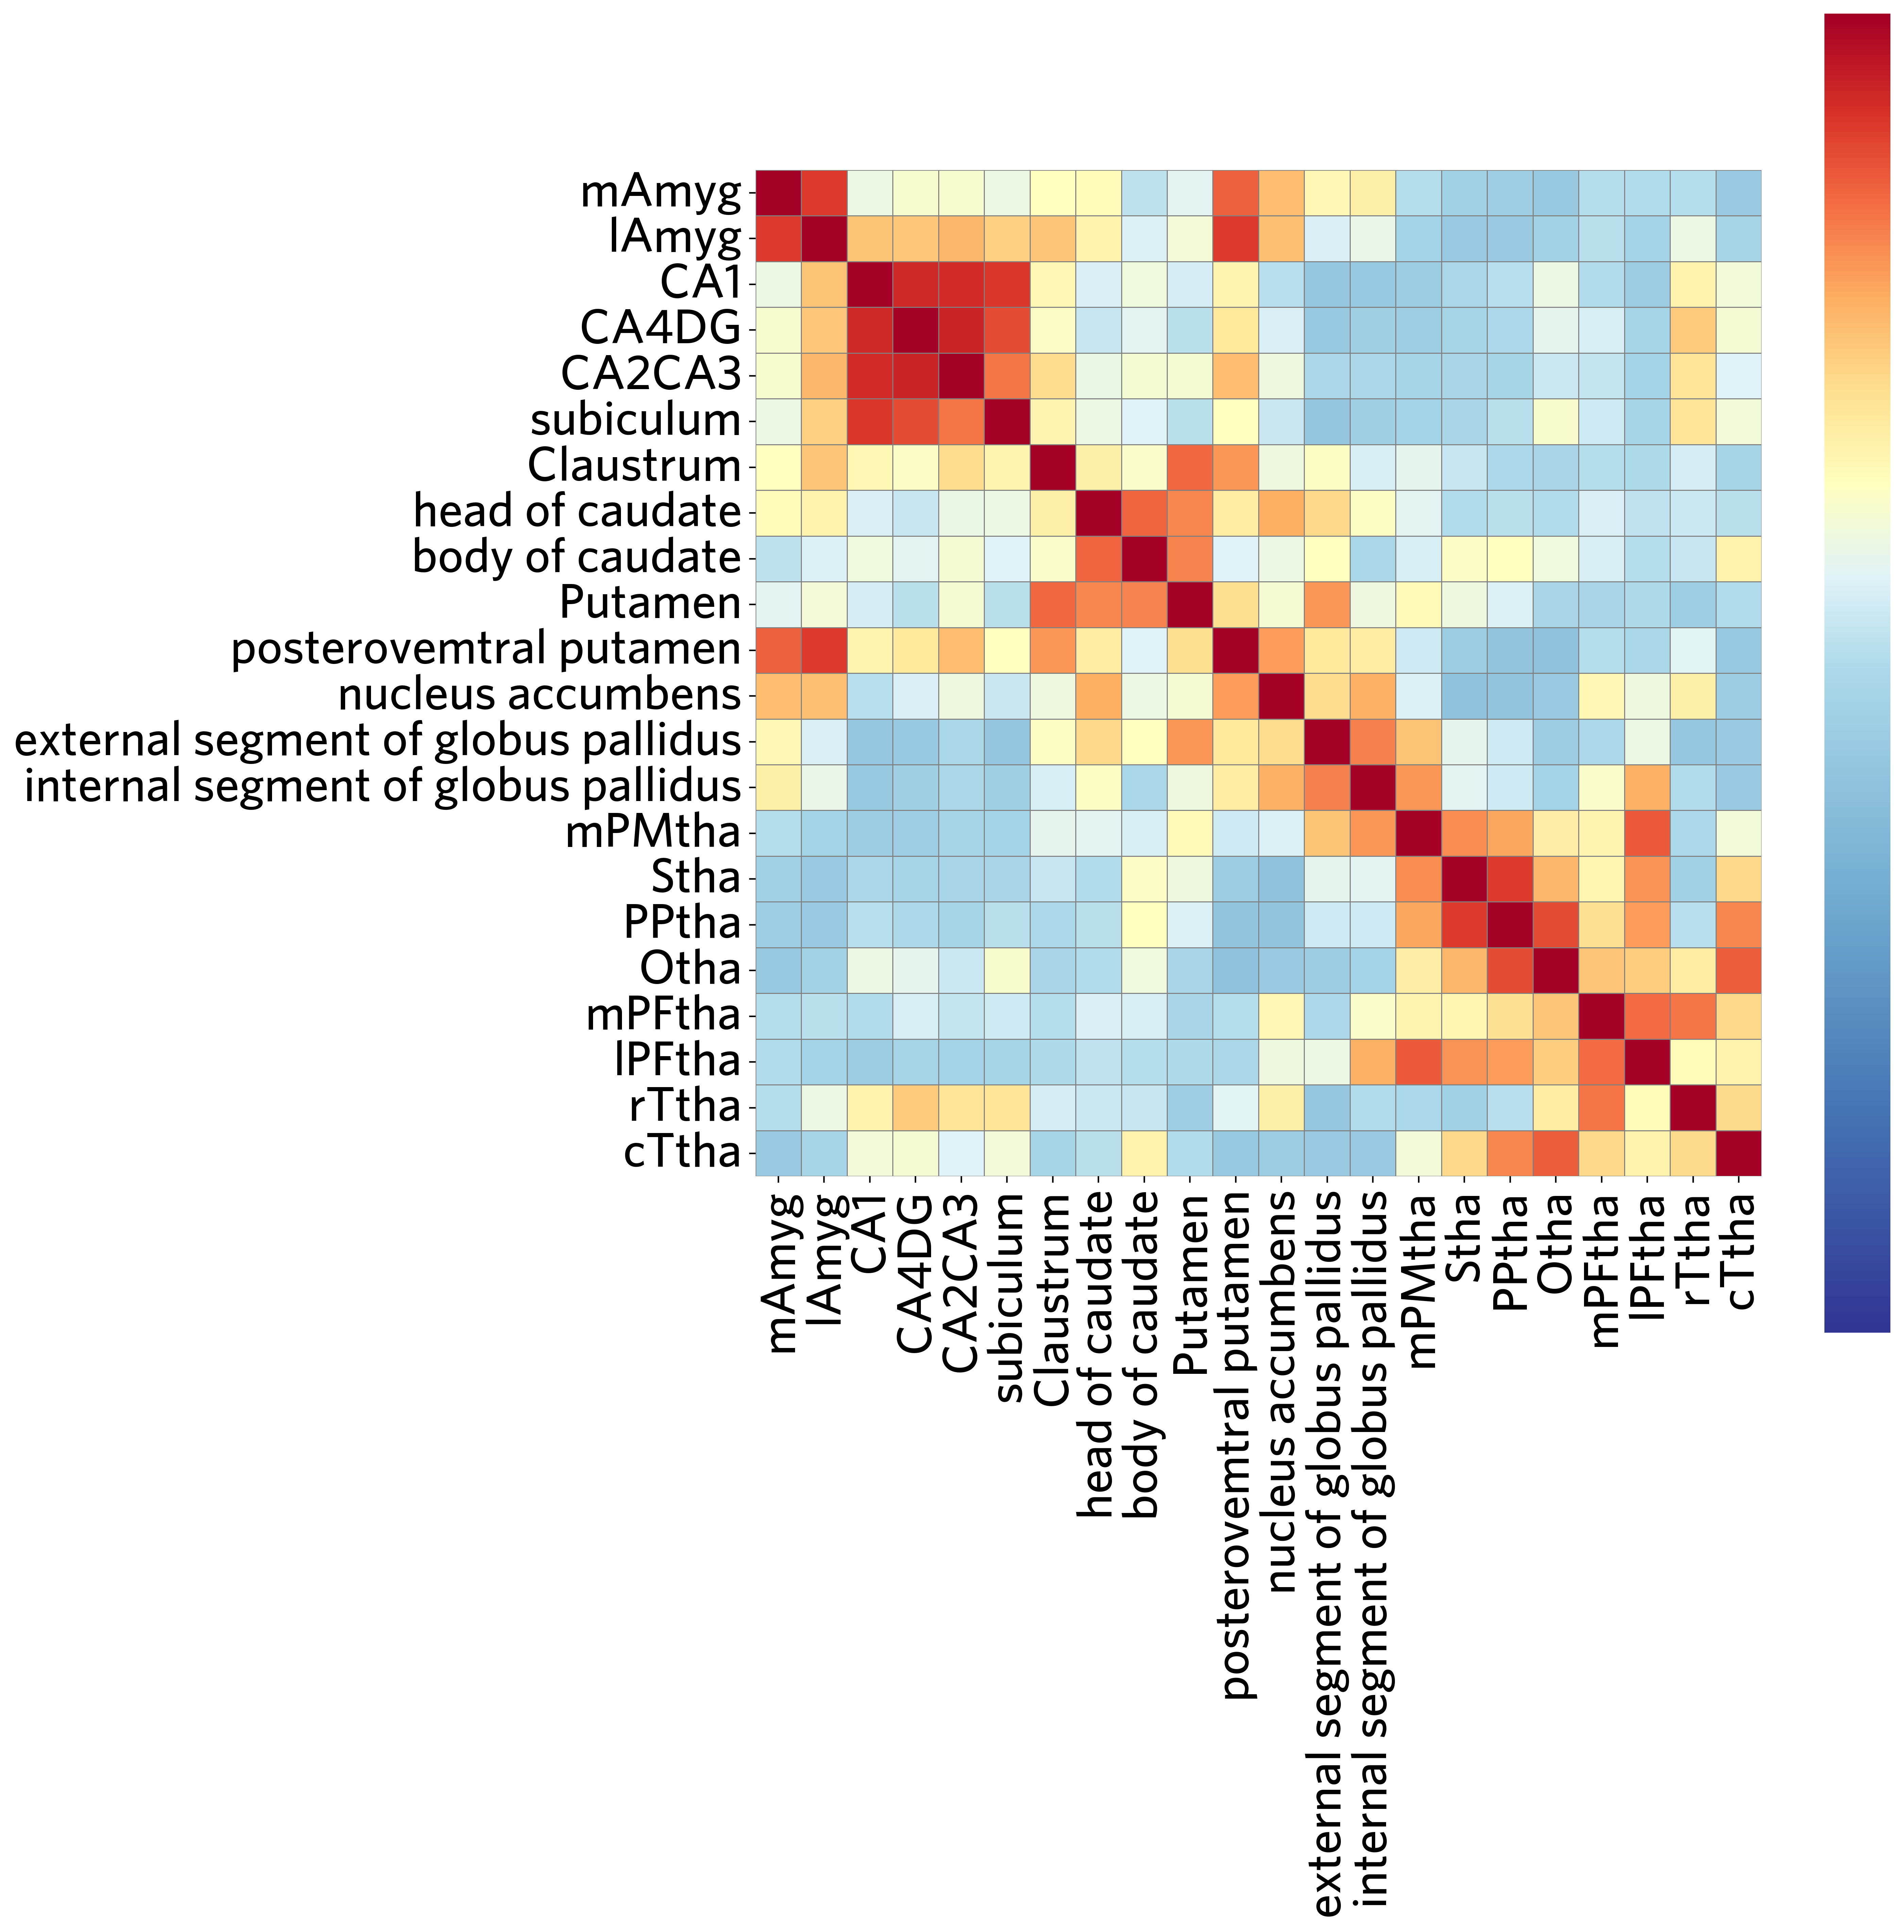

In [15]:
plt.figure(figsize=(15, 15),dpi=400)
colors = ["navy", "white", "#B22222"]
ax = sns.heatmap(H_subcortical_corr_mean,cmap=custom_jet_cmap,linewidths=0.5,linecolor='gray',vmin=-1,vmax=1,square=True,cbar_kws={"ticks": []})
plt.subplots_adjust(bottom=0.2)
# plt.yticks([])
plt.xticks([i+0.5 for i in range(0,22,1)],rotation=90,fontproperties=custom_font,size=26)
plt.yticks([i+0.5 for i in range(0,22,1)],rotation=0,fontproperties=custom_font,size=26)
plt.tight_layout()

## Cross-species Similarity Matrix

In [16]:
HM_cortical_corr = []
for path in tqdm(glob.glob(cortical_embedding_path)):
    human_cortical_emb = pd.read_csv(os.path.join(path,'Human_Cortical_Embedding.csv'))
    mouse_cortical_emb = pd.read_csv(os.path.join(path,'Mouse_Cortical_Embedding.csv'))
    human_cortical_emb.set_index('index',inplace = True,drop = True)
    mouse_cortical_emb.set_index('index',inplace = True ,drop=True)
    corr_ = np.corrcoef(human_cortical_emb.values,mouse_cortical_emb.values)[:105,105:]
    HM_cortical_corr.append(corr_)

100%|██████████| 1000/1000 [00:21<00:00, 46.04it/s]


In [17]:
HM_cortical_corr_mean = pd.DataFrame(np.mean(HM_cortical_corr,axis=0),index = human_cortical_emb.index.values,columns = mouse_cortical_emb.index.values)

In [18]:
HM_cortical_corr_mean

ACAd      ACAv        PL       ILA      ORBl      ORBm     ORBvl  \
A8m     0.691649  0.532105  0.263264  0.281165  0.644346  0.305938  0.330660   
A8dl    0.664158  0.537172  0.207735  0.189252  0.701419  0.278547  0.349224   
A9l     0.685080  0.642108  0.336964  0.286095  0.707307  0.420504  0.536309   
A6dl    0.503252  0.366779  0.018690  0.053592  0.539590  0.052611  0.082784   
A6m     0.582297  0.436826  0.148270  0.205637  0.488549  0.174938  0.141457   
...          ...       ...       ...       ...       ...       ...       ...   
A28/34  0.438651  0.426281  0.537952  0.629411  0.034581  0.491401  0.294182   
TH      0.298217  0.306803  0.402573  0.519521 -0.104247  0.335606  0.088650   
TI      0.326353  0.287682  0.543597  0.597034  0.010158  0.466140  0.286418   
rpSTS  -0.236409 -0.158215 -0.164033 -0.248441  0.195719 -0.152320 -0.074224   
cpSTS  -0.199077 -0.091396 -0.224965 -0.300815  0.155587 -0.203766 -0.133178   

             MOp       MOs     SSp-n  ...       AIv       TEa      PERI  \
A8m     0.650156  0.674033  0.129882  ...  0.415260 -0.040896  0.000909   
A8dl    0.717835  0.752180  0.165754  ...  0.314509 -0.166703 -0.124175   
A9l     0.615378  0.789110  0.140809  ...  0.328039 -0.133879 -0.123987   
A6dl    0.738517  0.538780  0.292399  ...  0.206717 -0.181555 -0.124560   
A6m     0.611456  0.533928  0.178395  ...  0.336123 -0.028804  0.018606   
...          ...       ...       ...  ...       ...       ...       ...   
A28/34 -0.120052  0.263694 -0.212429  ...  0.701682  0.795061  0.874687   
TH     -0.150461  0.079591 -0.113253  ...  0.531473  0.727818  0.747903   
TI     -0.151110  0.204605 -0.216118  ...  0.698700  0.888211  0.936186   
rpSTS   0.271530  0.022401  0.517985  ... -0.211555 -0.054451 -0.054164   
cpSTS   0.367447  0.067220  0.603156  ... -0.272209 -0.173583 -0.176729   

             ECT      AUDd      AUDp     AUDpo      AUDv        GU      VISC  
A8m     0.144364 -0.131564 -0.021226  0.006126 -0.133926  0.218261  0.071705  
A8dl    0.008226 -0.164181 -0.074121 -0.130299 -0.209939  0.178925  0.042258  
A9l    -0.005356 -0.104841 -0.013822 -0.116406 -0.133923  0.301936  0.182386  
A6dl    0.013915 -0.213839 -0.168932 -0.127909 -0.279200 -0.002179 -0.090434  
A6m     0.183405 -0.167256 -0.069392  0.045352 -0.186744  0.082742 -0.052264  
...          ...       ...       ...       ...       ...       ...       ...  
A28/34  0.909987  0.331716  0.508912  0.797787  0.577123  0.512263  0.416936  
TH      0.811583  0.416384  0.497341  0.790883  0.466876  0.305797  0.193064  
TI      0.854647  0.485126  0.642155  0.839454  0.775683  0.614428  0.572036  
rpSTS  -0.204738  0.443362  0.241353 -0.118540  0.173291 -0.011980  0.188513  
cpSTS  -0.264890  0.286030  0.078679 -0.194360 -0.003364 -0.122494  0.029957  

[105 rows x 39 columns]

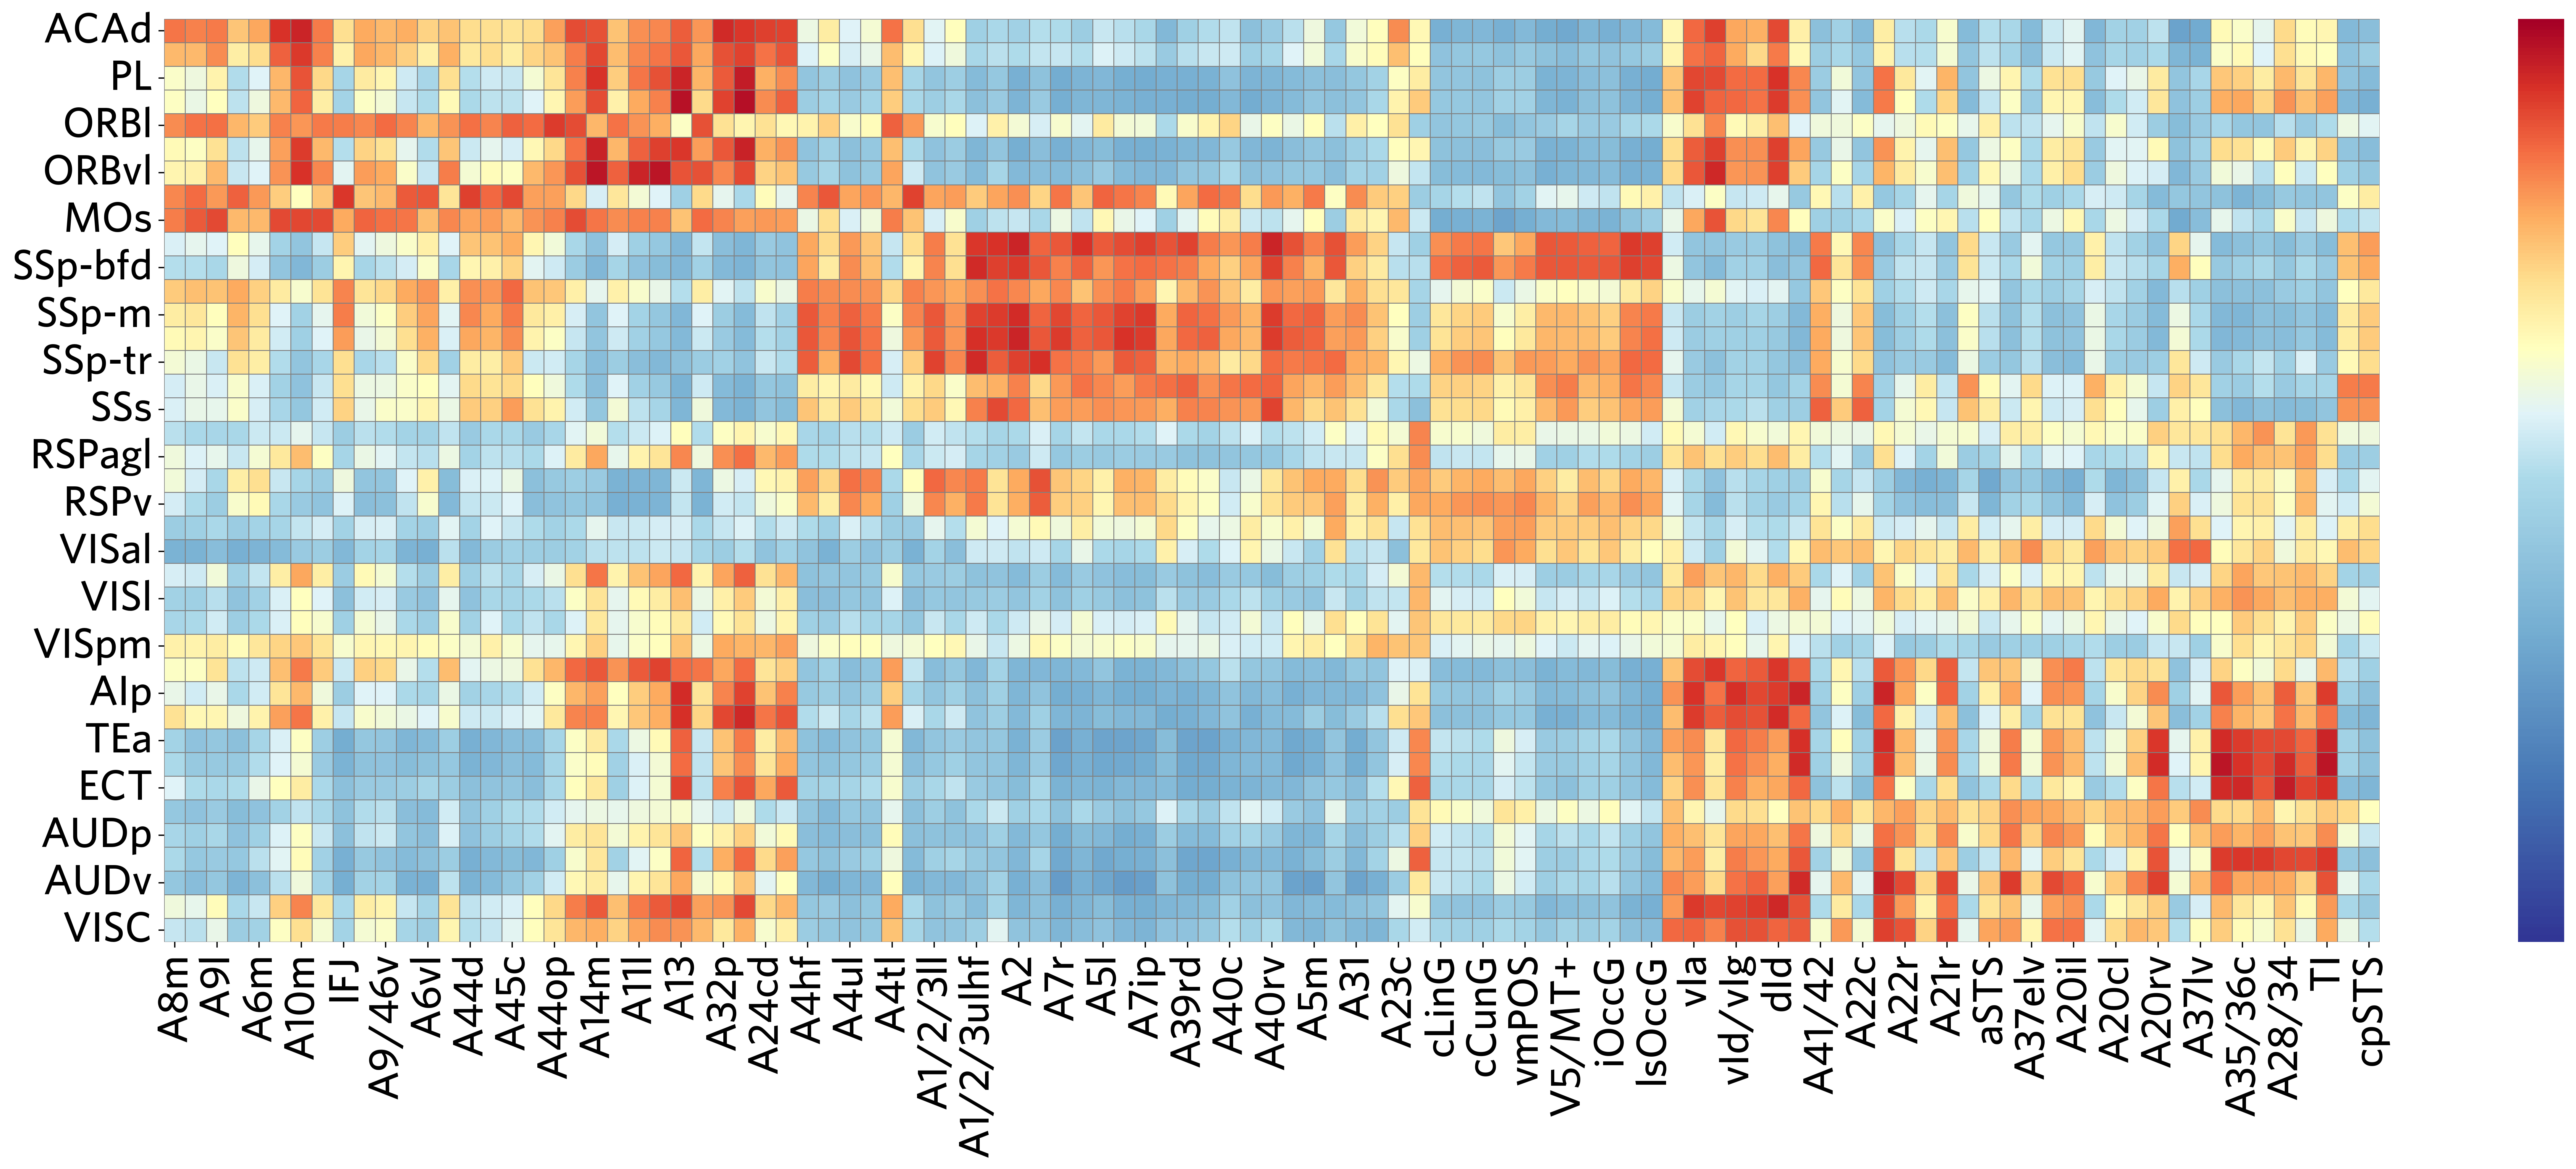

In [19]:
plt.figure(figsize=(25, 10),dpi=400)
colors = ["navy", "white", "#B22222"]
ax = sns.heatmap(HM_cortical_corr_mean.T,cmap=custom_jet_cmap,linewidths=0.5,linecolor='gray',vmin=-1,vmax=1,square=False,cbar_kws={"ticks": []})
plt.subplots_adjust(bottom=0.2)
# plt.yticks([])
plt.xticks([i+0.5 for i in range(0,106,2)],rotation=90,fontproperties=custom_font,size=26)
plt.yticks([i+0.5 for i in range(0,39,2)],rotation=0,fontproperties=custom_font,size=26)
plt.tight_layout()

In [20]:
HM_subcortical_corr = []
for path in tqdm(glob.glob(subcortical_embedding_path)):
    human_subcortical_emb = pd.read_csv(os.path.join(path,'Human_SubCortical_Embedding.csv'))
    mouse_subcortical_emb = pd.read_csv(os.path.join(path,'Mouse_SubCortical_Embedding.csv'))
    human_subcortical_emb.set_index('index',inplace = True,drop = True)
    mouse_subcortical_emb.set_index('index',inplace = True ,drop=True)
    corr_ = np.corrcoef(human_subcortical_emb.values,mouse_subcortical_emb.values)[:22,22:]
    HM_subcortical_corr.append(corr_)

100%|██████████| 1000/1000 [00:18<00:00, 54.64it/s]


In [21]:
HM_subcortical_corr_mean = pd.DataFrame(np.mean(HM_subcortical_corr,axis=0),index = human_subcortical_emb.index.values,columns = mouse_subcortical_emb.index.values)

In [22]:
plt.figure(figsize=(25, 15),dpi=400)
colors = ["navy", "white", "#B22222"]
ax = sns.heatmap(HM_subcortical_corr_mean.T,cmap=custom_jet_cmap,linewidths=0.5,linecolor='gray',vmin=-1,vmax=1,square=False,cbar_kws={"ticks": []})
plt.subplots_adjust(bottom=0.2)
# plt.yticks([])
plt.xticks([i+0.5 for i in range(0,22,1)],rotation=90,fontproperties=custom_font,size=36)
plt.yticks([i+0.5 for i in range(0,30,2)],rotation=0,fontproperties=custom_font,size=36)
plt.tight_layout()

## Potential homologous regions' rank of Cross-species Matrix

In [23]:
homo_mouse_region_cortex=['PL','PL','ACAd','ACAv','ACAd','ACAv','ACAd','ACAv','ACAd','ACAv','RSPd','RSPd','RSPv','RSPv','ORBl','ORBl','ORBl','ORBl','ORBm','ORBm','ORBm','ORBm','ORBvl','ORBvl','ORBvl','ORBvl','MOp','MOp','MOp','MOp','SSp-ul',
                   'SSp-m','SSp-ll','SSp-tr','VISp','VISp','VISp','VISp','AId','AIv','AUDp']
homo_human_region_cortex=['A32p','A32sg','A32p','A32p','A32sg','A32sg','A24rv','A24rv','A24cd','A24cd','A23d','A23v','A23d','A23v','A11l','A11m','A12/47o','A12/47l','A11l','A11m','A12/47o','A12/47l','A11l','A11m','A12/47o','A12/47l','A4hf','A4t','A4ul','A4ll','A1/2/3ulhf',
                   'A1/2/3tonIa','A1/2/3ll','A1/2/3tru','cCunG','rCunG','cLinG','rLinG','dIa','vIa','TE1.0 and TE1.2']

In [24]:
homo_mouse_region_subcortex = ['DG','CP','PAL','CA1','SUB','CA2','CA3','ACB','MED']
homo_human_region_subcortex = ['CA4DG','body of caudate','external segment of globus pallidus','CA1','subiculum','CA2CA3','CA2CA3','nucleus accumbens','mPFtha']

In [27]:
def get_homologous_rank(hm_matrix,homo_mouse_region,homo_human_region):
    
    Human_size=hm_matrix.values.shape[0]
    region_info=[]

    for i,j in zip(homo_mouse_region,homo_human_region):
        region_info.append((i,j))

    accuracy_list=[]
    
    for region in region_info:
        
        mouse_region=region[0]
        human_region=region[1]
        dict_={}
        hm_rank_dataframe=pd.DataFrame(hm_matrix[mouse_region].sort_values(ascending=False))
        hm_rank_dataframe['rank']=[i+1 for i in range(Human_size)]
        hm_rank=int(hm_rank_dataframe[hm_rank_dataframe.index==human_region]['rank'].values)
        
        dict_['Region']=(mouse_region,human_region)
        dict_['rank']=hm_rank
        dict_['pearson_r']=hm_rank_dataframe.iloc[hm_rank-1].values
        
        accuracy_list.append(dict_)
        
    return accuracy_list

### Cortical rank

In [30]:
Cortical_rank = get_homologous_rank(HM_cortical_corr_mean,homo_mouse_region_cortex,homo_human_region_cortex)

In [31]:
Cortical_rank

[{'Region': ('PL', 'A32p'),
  'rank': 9,
  'pearson_r': array([0.75398573, 9.        ])},
 {'Region': ('PL', 'A32sg'),
  'rank': 1,
  'pearson_r': array([0.91180233, 1.        ])},
 {'Region': ('ACAd', 'A32p'),
  'rank': 2,
  'pearson_r': array([0.8706069, 2.       ])},
 {'Region': ('ACAv', 'A32p'),
  'rank': 4,
  'pearson_r': array([0.78094884, 4.        ])},
 {'Region': ('ACAd', 'A32sg'),
  'rank': 4,
  'pearson_r': array([0.83724724, 4.        ])},
 {'Region': ('ACAv', 'A32sg'),
  'rank': 2,
  'pearson_r': array([0.81150849, 2.        ])},
 {'Region': ('ACAd', 'A24rv'),
  'rank': 7,
  'pearson_r': array([0.8056086, 7.       ])},
 {'Region': ('ACAv', 'A24rv'),
  'rank': 5,
  'pearson_r': array([0.76905889, 5.        ])},
 {'Region': ('ACAd', 'A24cd'),
  'rank': 6,
  'pearson_r': array([0.81468829, 6.        ])},
 {'Region': ('ACAv', 'A24cd'),
  'rank': 10,
  'pearson_r': array([ 0.69590081, 10.        ])},
 {'Region': ('RSPd', 'A23d'),
  'rank': 7,
  'pearson_r': array([0.63161941, 7

In [34]:
np.mean([i['rank'] for i in Cortical_rank])

9.975609756097562

### Subcortical rank

In [35]:
Subcortical_rank = get_homologous_rank(HM_subcortical_corr_mean,homo_mouse_region_subcortex,homo_human_region_subcortex)

In [36]:
Subcortical_rank

[{'Region': ('DG', 'CA4DG'),
  'rank': 3,
  'pearson_r': array([0.67461594, 3.        ])},
 {'Region': ('CP', 'body of caudate'),
  'rank': 2,
  'pearson_r': array([0.790883, 2.      ])},
 {'Region': ('PAL', 'external segment of globus pallidus'),
  'rank': 3,
  'pearson_r': array([0.7306512, 3.       ])},
 {'Region': ('CA1', 'CA1'),
  'rank': 1,
  'pearson_r': array([0.85968028, 1.        ])},
 {'Region': ('SUB', 'subiculum'),
  'rank': 1,
  'pearson_r': array([0.83943157, 1.        ])},
 {'Region': ('CA2', 'CA2CA3'),
  'rank': 4,
  'pearson_r': array([0.67513007, 4.        ])},
 {'Region': ('CA3', 'CA2CA3'),
  'rank': 4,
  'pearson_r': array([0.778158, 4.      ])},
 {'Region': ('ACB', 'nucleus accumbens'),
  'rank': 1,
  'pearson_r': array([0.78793748, 1.        ])},
 {'Region': ('MED', 'mPFtha'),
  'rank': 1,
  'pearson_r': array([0.84016324, 1.        ])}]

In [37]:
np.mean([i['rank'] for i in Subcortical_rank])

2.2222222222222223